In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('zomato.csv')

In [ ]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns
categorical_col


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
cardinality = df[categorical_col].nunique()
cardinality

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [5]:
#low_cardinality = [col for col in cardinality.index if cardinality[col] <= 5]
#low_cardinality_df_encoded = pd.get_dummies(df[low_cardinality], drop_first=True)
#low_cardinality_df_encoded

In [6]:
#df = pd.concat([df, low_cardinality_df_encoded], axis=1)
#df = df.drop(columns=low_cardinality)

In [7]:


# Identify low-cardinality columns (columns with <= 5 unique values)
#low_cardinality = [col for col in df.columns if df[col].nunique() <= 5]

# Initialize the OneHotEncoder
#encoder = OneHotEncoder(drop='first', sparse_output=False)  

# Fit and transform the low-cardinality columns
#encoded_array = encoder.fit_transform(df[low_cardinality])

# Create a DataFrame with the encoded data
#low_cardinality_df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality),  # Generate meaningful column names index=df.index  # Maintain the original DataFrame index)
#low_cardinality_df_encoded


In [8]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table   rate  votes                             phone  \
0             1           1  4.1/5    775    080 42297555\r\n+91 9743772233   
1             1           0  4

In [9]:
# Check unique values in 'rate'
print(df['rate'].unique())

# Clean the 'rate' column
df['rate'] = df['rate'].str.replace('/5', '').replace('NEW', None).replace('-', None).astype(float)

# Handle missing values
if df['rate'].isnull().sum() > 0:
    print(f"Found {df['rate'].isnull().sum()} missing or invalid values in 'rate'.")
    df['rate'].fillna(df['rate'].mean(), inplace=True)

# Verify the cleaned column
print("\nAfter cleaning:")
print(df['rate'].head())
print(df.info())


['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
Found 10052 missing or invalid values in 'rate'.

After cleaning:
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                 

C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_15640\3670666607.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [11]:
df = df.drop(columns=['phone']) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   location                     51696 non-null  object 
 8   rest_type                    51490 non-null  object 
 9   dish_liked                   23639 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51371 non-null  object 
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

In [13]:
# Remove commas and convert to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Handle missing values by filling with the mean
if df['approx_cost(for two people)'].isnull().sum() > 0:
    print(f"Found {df['approx_cost(for two people)'].isnull().sum()} missing values.")
    df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)

# Verify the cleaned column
print("\nCleaned 'approx_cost(for two people)' column:")
print(df['approx_cost(for two people)'].head())
print("\nSummary of unique values:")
print(df['approx_cost(for two people)'].value_counts())

Found 346 missing values.

Cleaned 'approx_cost(for two people)' column:
0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

Summary of unique values:
approx_cost(for two people)
300.0     7576
400.0     6562
500.0     4980
200.0     4857
600.0     3714
          ... 
60.0         1
5000.0       1
3700.0       1
469.0        1
160.0        1
Name: count, Length: 71, dtype: int64


C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_15640\2080400215.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   location                     51696 non-null  object 
 8   rest_type                    51490 non-null  object 
 9   dish_liked                   23639 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51717 non-null  float64
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

In [15]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns
categorical_col


Index(['url', 'address', 'name', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [16]:
LabelEncoder=LabelEncoder
for col in categorical_col:
    df[col]=LabelEncoder().fit_transform(df[col])
    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  int32  
 1   address                      51717 non-null  int32  
 2   name                         51717 non-null  int32  
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   location                     51717 non-null  int32  
 8   rest_type                    51717 non-null  int32  
 9   dish_liked                   51717 non-null  int32  
 10  cuisines                     51717 non-null  int32  
 11  approx_cost(for two people)  51717 non-null  float64
 12  reviews_list                 51717 non-null  int32  
 13  menu_item       

In [18]:
df=df.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   url                          51717 non-null  int32
 1   address                      51717 non-null  int32
 2   name                         51717 non-null  int32
 3   online_order                 51717 non-null  int32
 4   book_table                   51717 non-null  int32
 5   rate                         51717 non-null  int32
 6   votes                        51717 non-null  int32
 7   location                     51717 non-null  int32
 8   rest_type                    51717 non-null  int32
 9   dish_liked                   51717 non-null  int32
 10  cuisines                     51717 non-null  int32
 11  approx_cost(for two people)  51717 non-null  int32
 12  reviews_list                 51717 non-null  int32
 13  menu_item                    51717 non-null  i

In [20]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,22195,8016,3690,1,1,4,775,1,27,3651,2159,800,10851,9097,0,1
1,41273,3844,7022,1,0,4,787,1,27,2964,952,800,12530,9097,0,1
2,92,784,6499,1,0,3,918,1,22,1416,766,800,4652,9097,0,1
3,1160,2515,199,0,0,3,88,1,78,2766,2555,300,9293,9097,0,1
4,18293,340,2940,0,0,3,166,4,27,3453,2188,600,15505,9097,0,1


In [21]:
x=df.drop('online_order', axis=1)
y=df['online_order']

In [22]:
x_train, x_temp, y_train, y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_val, x_test, y_val, y_test=train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


In [24]:
log_reg_model = LogisticRegression(max_iter=1000,solver='lbfgs', random_state=42)
log_reg_model.fit(x_train_scaled, y_train)
y_val_pred = log_reg_model.predict(x_val_scaled)

In [25]:
# Evaluate the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 73.96%


In [26]:
# Now, evaluate the model on the test data
y_test_pred = log_reg_model.predict(x_test_scaled)

In [27]:
# Test accuracy and evaluation
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 73.43%


In [ ]:
from sklearn.metrics import classification_report
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      2123
           1       0.79      0.75      0.77      3049

    accuracy                           0.73      5172
   macro avg       0.73      0.73      0.73      5172
weighted avg       0.74      0.73      0.74      5172



In [29]:
cv_scores = cross_val_score(log_reg_model, x_train_scaled, y_train, cv=10)  # 'cv=5' means 5-fold cross-validation
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.72837119 0.73731271 0.73441276 0.72661349 0.72975586 0.72298767
 0.72057046 0.72226251 0.72975586 0.72951414]
Mean cross-validation score:  0.728155666022116


In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'solver': 'lbfgs'}


In [31]:
# Use the best parameters to initialize the Logistic Regression model
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], 
                                 solver=grid_search.best_params_['solver'], 
                                 random_state=42)

# Train the model on the training set with the best parameters
best_logreg.fit(x_train_scaled, y_train)

# Predict on the validation set
y_val_pred = best_logreg.predict(x_val_scaled)

# Evaluate the model performance on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model performance on the test set
y_test_pred = best_logreg.predict(x_test_scaled)
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2141
           1       0.80      0.74      0.77      3031

    accuracy                           0.74      5172
   macro avg       0.74      0.74      0.74      5172
weighted avg       0.75      0.74      0.74      5172


Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      2123
           1       0.79      0.74      0.77      3049

    accuracy                           0.73      5172
   macro avg       0.73      0.73      0.73      5172
weighted avg       0.74      0.73      0.73      5172


Test Confusion Matrix:
[[1525  598]
 [ 781 2268]]


In [32]:
# Cross-validation with the final model
cv_scores_final = cross_val_score(best_logreg, x_train_scaled, y_train, cv=5)
print("\nFinal Model Cross-Validation Accuracy:", cv_scores_final.mean())


Final Model Cross-Validation Accuracy: 0.7288085138390781


In [33]:
# Regularization: Use GridSearchCV to tune the 'C' parameter
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']})

In [34]:
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'C': 100, 'solver': 'lbfgs'}


In [35]:
# Using the best model found through grid search
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(x_test_scaled)
accuracy=accuracy_score(y_val,y_pred)
accuracy

0.5114075792730085

In [36]:
#70/30ga Test Accuracy with Best Hyperparameters: 0.51  -----73.42(without Hyper)
#80/20ga Test Accuracy with Best Hyperparameters: 0.51 ----73.96(without Hyper)

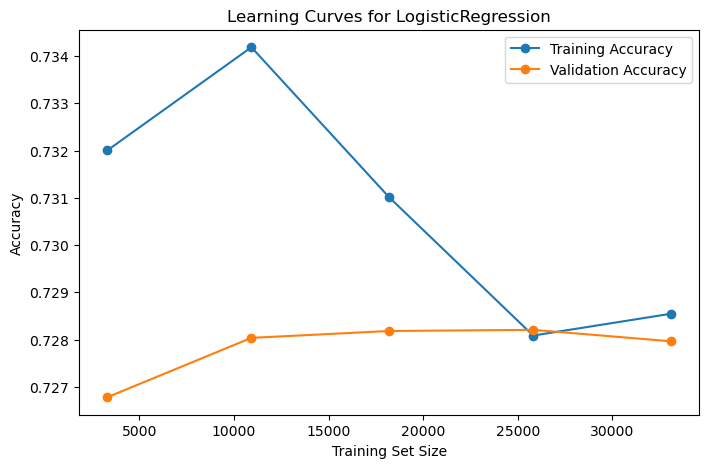

In [37]:
#Overfittingni aniqlash

from sklearn.model_selection import learning_curve




# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    log_reg_model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0]
)

# Calculate means and standard deviations
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves for LogisticRegression')
plt.show()


In [38]:
# Define the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(x_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(x_test_scaled)
print(f"Training Accuracy: {model.score(x_train_scaled, y_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Training Accuracy: 0.7285669397916515
Test Accuracy: 0.734338747099768


In [39]:
# Define the logistic regression model
model = LogisticRegression(random_state=42)

# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'elasticnet'],  # Regularization type
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [100, 200, 300],  # Number of iterations for convergence
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to training data
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred = best_model.predict(x_test_scaled)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {best_model.score(x_train_scaled, y_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\erniyazov_sarvarbek\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\erniyazov_sarvarbek\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\erniyazov_sarvarbek\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\erniyazov_sarvar

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.7294854131921785
Test Accuracy: 0.7341453982985305


In [40]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_val_pred=dt_model.predict(x_val_scaled)
accuracy=accuracy_score(y_val,y_val_pred)
accuracy

0.8629156999226605

In [41]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_val_pred=rf_model.predict(x_val_scaled)
accuracy=accuracy_score(y_val,y_val_pred)
accuracy

0.9269141531322506

In [42]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
y_val_pred=knn_model.predict(x_val_scaled)
accuracy=accuracy_score(y_val,y_val_pred)
accuracy

0.8066511987625676

In [43]:
# Decision Tree Cross-Validation
cv_scores_dt = cross_val_score(dt_model, x_train_scaled, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", cv_scores_dt)
print("Mean Cross-Validation Score for Decision Tree:", cv_scores_dt.mean())

# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(rf_model, x_train_scaled, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean Cross-Validation Score for Random Forest:", cv_scores_rf.mean())

# KNN Cross-Validation
cv_scores_knn = cross_val_score(knn_model, x_train_scaled, y_train, cv=5)
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("Mean Cross-Validation Score for KNN:", cv_scores_knn.mean())

Decision Tree Cross-Validation Scores: [0.84821752 0.85208459 0.8489426  0.85629683 0.84940778]
Mean Cross-Validation Score for Decision Tree: 0.8509898659726133
Random Forest Cross-Validation Scores: [0.9126284  0.91589124 0.91528701 0.91829828 0.92047377]
Mean Cross-Validation Score for Random Forest: 0.9165157407143697
KNN Cross-Validation Scores: [0.78839879 0.79069486 0.79492447 0.79369108 0.79574571]
Mean Cross-Validation Score for KNN: 0.7926909833665243
